In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Introduction

The ease with which we recognize a face, understand spoken words, read handwritten characters, identify our car keys in our pocket by feel, and decide whether an apple is ripe by its smell belies the astoundingly complex processes that underlie these acts of pattern recognition. **Pattern recognition** — the act of taking in raw data and taking an action based on the "category" of the pattern — has been crucial for our survival. Over the past tens of millions of years, we have evolved highly sophisticated neural and cognitive systems for such tasks.

## 1.1 Machine Perception

It is natural that we should seek to design and build machines that can recognize patterns. From automated speech recognition, fingerprint identification, optical character recognition, DNA sequence identification, and more, it is clear that reliable, accurate pattern recognition by machine would be immensely useful. 

Moreover, in solving the myriad problems required to build such systems, we gain a deeper understanding and appreciation for pattern recognition systems in the natural world — particularly in humans. For applications like speech and visual recognition, our design efforts may even be influenced by natural solutions, both in algorithms and special-purpose hardware design.

## 1.2 An Example: Fish Sorting

To illustrate the complexity of some of these problems, consider an example of a fish-packing plant that wants to automate the process of sorting incoming fish on a conveyor belt by species. As a pilot project, we aim to separate sea bass from salmon using optical sensing.

We set up a camera, take sample images, and note some physical differences between the two types of fish — length, lightness, width, fin characteristics, mouth position, and more. These observations suggest **features** to use in our classifier. However, we encounter noise or variations in the images due to lighting, fish position, and camera electronics.

### Feature Selection and Classification

Our goal is to hypothesize models for each species, eliminate noise, and classify the fish by choosing the best-fitting model for each sensed pattern. Here’s an outline of the prototype system:

1. **Image Capture**: A camera captures an image of the fish.
2. **Preprocessing**: Signals from the camera are simplified without losing relevant information, possibly using segmentation to isolate fish images from each other and the background.
3. **Feature Extraction**: Extract relevant features (e.g., fish length, lightness of scales).
4. **Classification**: Classify the fish based on extracted features, adjusting for factors like lighting variations.

### Example 1: Classifying by Length

Suppose that a sea bass is generally longer than a salmon. Length becomes a feature to examine. If $ l $ is the length of the fish, we choose a threshold $ l^* $ and classify as follows:

$$
\text{Classify as sea bass if } l > l^*
$$

However, histograms show that while sea bass are generally longer, there is significant overlap, making length alone a poor classifier.

### Example 2: Classifying by Lightness

We attempt another feature: **average lightness of fish scales**, ensuring consistent illumination. The new histograms (Fig. 1.3) show much clearer separation between species.

#### Adjusting Decision Boundaries

In some cases, costs of misclassification vary. Suppose customers tolerate occasional salmon in sea bass cans but dislike sea bass in salmon cans. Then, our decision boundary $ x^* $ for lightness should adjust as follows:

$$
\text{Move } x^* \text{ to reduce sea bass in salmon cans}
$$

This approach, though seemingly simple, demonstrates how feature selection and boundary adjustments improve classification performance while respecting cost asymmetry.

---

**Conclusion**: The example demonstrates a classic pattern recognition workflow, highlighting preprocessing, feature extraction, and decision boundary tuning.


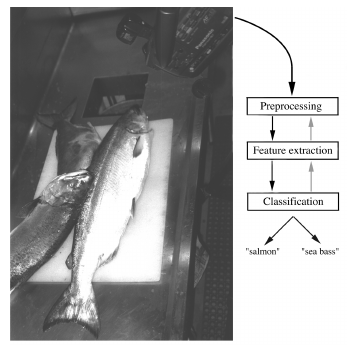

Fig.1: The objects to be classiﬁed are ﬁrst sensed by a transducer (camera), whose signals are preprocessed, then the features extracted and ﬁnally the classiﬁcation emitted (here either “salmon” or “sea bass”). Although the information ﬂow is often chosen to be from the source to the classiﬁer (“bottom-up”), some systems employ “top-down” ﬂow as well, in which earlier levels of processing can be altered based on the tentative or preliminary response in later levels (gray arrows). Yet others combine two or more stages into a uniﬁed step, such as simultaneous segmentation and feature extraction.

## Pattern Classification Example: Fish Sorting

In pattern classification tasks, an object to be classified is sensed, processed, and classified based on extracted features. In some systems, information flows from the source to the classifier in a **bottom-up** fashion, but in others, there may be a **top-down** approach. In top-down systems, preliminary results can influence earlier processing stages (indicated by gray arrows in Fig. 1.1). Some systems combine multiple stages into a unified step, such as simultaneous segmentation and feature extraction.

## Figure.1: Processing Flow

1. **Transducer**: A camera captures the raw image.
2. **Preprocessing**: Noise is reduced, and the background is removed.
3. **Feature Extraction**: Features like lightness or width are isolated.
4. **Classification**: Based on extracted features, the object is classified (as "salmon" or "sea bass").

## Decision Boundary and Classification Cost

When classifying fish as either sea bass or salmon, it is essential to consider **cost asymmetries** in misclassification. For instance, if classifying a sea bass as a salmon incurs a higher cost, we may set the decision threshold $ x^* $ lower. This consideration forms part of **decision theory**, where the goal is to choose an optimal decision rule that minimizes misclassification costs.

If only the **lightness** feature is used, we might set a decision threshold $ x^* $ to minimize errors, but performance may still be unsatisfactory. Suppose no single visual feature improves classification beyond lightness. In that case, we may incorporate additional features, like **width**.

## Figure.4: Feature Space and Decision Boundary

By incorporating two features, **lightness** $ x_1 $ and **width** $ x_2 $, the system can map each fish to a **feature vector**:

$$
x = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
$$

This vector forms a point in a **two-dimensional feature space** where we can separate classes. Suppose we collect feature data and observe points scattered in a plot, as shown in Fig.4. A decision boundary — a line dividing the two classes — can be set in this space. For example, we classify as **sea bass** if the feature vector falls above this line and as **salmon** if it falls below.

### Classification with Multiple Features

Adding more features (e.g., dorsal fin shape, eye placement) could further improve classification. However, some features may be redundant. For instance, if **eye color** perfectly correlates with width, it would add no benefit. Even with no restrictions on feature selection, too many features can complicate or degrade performance.

Suppose that additional features either add significant computational costs or marginal improvements. In that case, it may be optimal to base decisions solely on the two features, **lightness** and **width**. If our model is complex, a more intricate decision boundary, rather than a straight line, might better separate the classes.

---

By examining these steps in feature selection, decision theory, and boundary setting, we see how pattern classification leverages specific criteria to optimize decision-making in tasks like automated fish sorting.



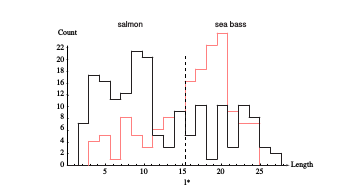

Fig.2: Histograms for the length feature for the two categories. No single thresh- old value l∗ (decision boundary) will serve to unambiguously discriminate between the two categories; using length alone, we will have some errors. The value l∗ marked will lead to the smallest number of errors, on average.

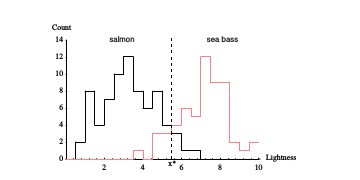

Fig.3: Histograms for the lightness feature for the two categories. No single threshold value x∗ (decision boundary) will serve to unambiguously discriminate be- tween the two categories; using lightness alone, we will have some errors. The value x∗ marked will lead to the smallest number of errors, on average.


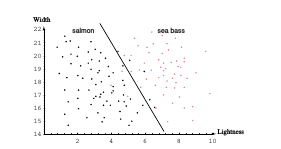

Fig.4: The two features of lightness and width for sea bass and salmon. The dark line might serve as a decision boundary of our classiﬁer. Overall classiﬁcation error on the data shown is lower than if we use only one feature as in Fig.3, but there will still be some errors.

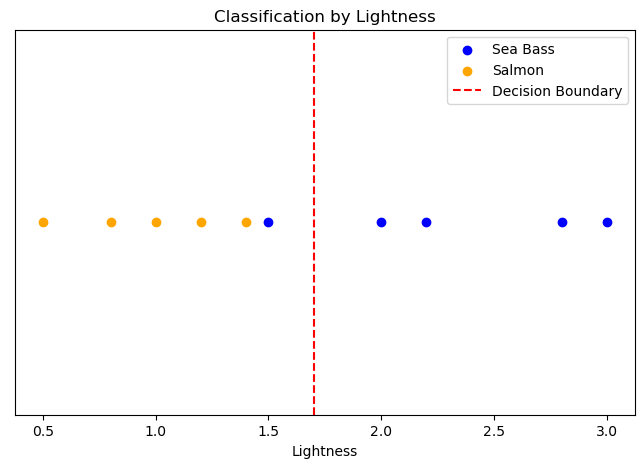

In [3]:
import matplotlib.pyplot as plt

# Sample data: lightness values for sea bass and salmon
sea_bass_lightness = [1.5, 2.0, 2.2, 2.8, 3.0]
salmon_lightness = [0.5, 0.8, 1.0, 1.2, 1.4]

# Decision threshold for lightness
threshold = 1.7

# Plot data
plt.figure(figsize=(8, 5))
plt.scatter(sea_bass_lightness, [1] * len(sea_bass_lightness), color='blue', label='Sea Bass')
plt.scatter(salmon_lightness, [1] * len(salmon_lightness), color='orange', label='Salmon')
plt.axvline(x=threshold, color='red', linestyle='--', label='Decision Boundary')

# Annotations and labels
plt.xlabel('Lightness')
plt.yticks([])
plt.legend()
plt.title('Classification by Lightness')
plt.show()


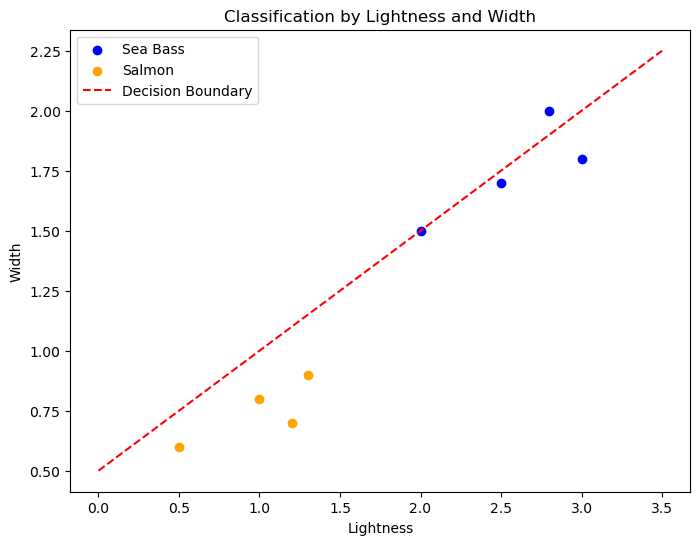

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: (lightness, width) for sea bass and salmon
sea_bass_features = [(2.0, 1.5), (2.5, 1.7), (3.0, 1.8), (2.8, 2.0)]
salmon_features = [(0.5, 0.6), (1.0, 0.8), (1.2, 0.7), (1.3, 0.9)]

# Convert lists to numpy arrays for plotting
sea_bass_features = np.array(sea_bass_features)
salmon_features = np.array(salmon_features)

# Define a decision boundary: for simplicity, we'll use a linear boundary
def decision_boundary(x):
    return 0.5 * x + 0.5

# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(sea_bass_features[:, 0], sea_bass_features[:, 1], color='blue', label='Sea Bass')
plt.scatter(salmon_features[:, 0], salmon_features[:, 1], color='orange', label='Salmon')

# Plot decision boundary
x_values = np.linspace(0, 3.5, 100)
y_values = decision_boundary(x_values)
plt.plot(x_values, y_values, color='red', linestyle='--', label='Decision Boundary')

# Annotations and labels
plt.xlabel('Lightness')
plt.ylabel('Width')
plt.legend()
plt.title('Classification by Lightness and Width')
plt.show()


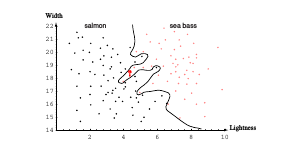

Fig.5: Overly complex models for the ﬁsh will lead to decision boundaries that are complicated. While such a decision may lead to perfect classiﬁcation of our training samples, it would lead to poor performance on future patterns. The novel test point marked ? is evidently most likely a salmon, whereas the complex decision boundary shown leads it to be misclassiﬁed as a sea bass.

The ease with which we recognize a face, understand spoken words, read handwritten characters, identify objects by touch, and determine whether an apple is ripe by its smell belies the astoundingly complex processes underlying pattern recognition. Pattern recognition is the act of taking in raw data and making decisions based on its "category" and has been crucial for survival. Over millions of years, humans have evolved sophisticated neural and cognitive systems for such tasks.

##  Machine Perception

We naturally aim to design machines that recognize patterns, such as in **speech recognition**, **fingerprint identification**, **optical character recognition**, and **DNA sequence identification**. Solving these challenges not only helps in building reliable systems but also deepens our understanding of human pattern recognition. Some machine designs take inspiration from natural processes, influencing algorithms and hardware.

## Example of Classification

Consider a fish-packing plant that automates sorting incoming fish into "sea bass" and "salmon" using optical sensing. We can distinguish them by certain features, like **length** and **lightness**, which form the basis of our classifier.

### Classifier Model

To model the features mathematically, we hypothesize two classes. For example, if sea bass are generally longer than salmon, then **length** can be a feature. We might classify a fish by checking if its length $ l $ exceeds a threshold $ l^* $.

The classifier operates as follows:
1. **Capture**: A camera captures an image of the fish.
2. **Preprocess**: Signals are processed to isolate relevant information, such as segmenting the fish from the background.
3. **Feature Extraction**: Extract measurable attributes (length, lightness) to classify.
4. **Classification**: Decide based on features if the fish is sea bass or salmon.

When classifying, the features are represented as a vector:

$$
x = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
$$

where $ x_1 $ represents lightness, and $ x_2 $ represents width.

### Cost Functions and Decision Boundaries

Different decision tasks impact our choice of features and decision boundaries. For example, a fish-packing company may wish to reduce the misclassification of sea bass as salmon to avoid customer dissatisfaction. This involves setting a decision boundary $ x^* $ for **lightness**, which reduces error.

### Generalization

A classifier's ability to generalize to unseen data is essential. Adding complexity to the model, as shown in Fig.5, may **overfit** training data without improving performance on new patterns.

To achieve generalization, a classifier should balance between complexity and simplicity, following **Occam's Razor**:

> Entities are not to be multiplied without necessity.

If additional features degrade performance, a simpler decision boundary, as shown in Fig.6, may be preferable.

## Statistical and Syntactic Pattern Recognition

1. **Statistical Pattern Recognition**: Focuses on statistical properties, usually through probability densities, to handle **noisy data**.
2. **Syntactic Pattern Recognition**: Uses rules or grammars to classify, e.g., checking if a sentence is grammatical based on word frequencies.

### Representation in Pattern Recognition

Choosing a suitable representation is crucial in pattern recognition. Patterns may be represented as:
- Real-valued vectors
- Ordered attribute lists
- Part-based descriptions

A good representation should reveal structural relationships naturally and represent the model efficiently.


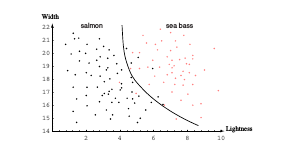

Fig.6: The decision boundary shown might represent the optimal tradeoﬀ between performance on the training set and simplicity of classiﬁer.


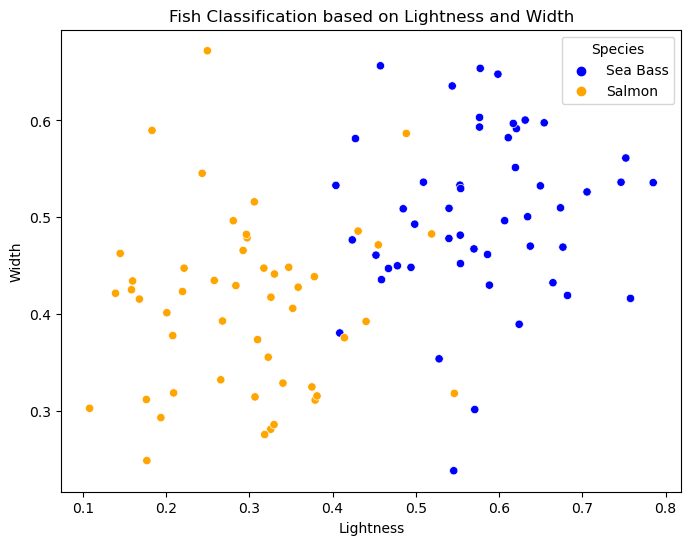

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample dataset
# Let's create a small dataset for sea bass and salmon with two features: lightness and width
np.random.seed(42)
sea_bass_lightness = np.random.normal(0.6, 0.1, 50)  # mean lightness around 0.6
sea_bass_width = np.random.normal(0.5, 0.1, 50)      # mean width around 0.5
salmon_lightness = np.random.normal(0.3, 0.1, 50)    # mean lightness around 0.3
salmon_width = np.random.normal(0.4, 0.1, 50)        # mean width around 0.4

# Create a DataFrame
data = pd.DataFrame({
    'Lightness': np.concatenate([sea_bass_lightness, salmon_lightness]),
    'Width': np.concatenate([sea_bass_width, salmon_width]),
    'Species': ['Sea Bass'] * 50 + ['Salmon'] * 50
})

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Lightness', y='Width', hue='Species', palette=['blue', 'orange'])
plt.title('Fish Classification based on Lightness and Width')
plt.xlabel('Lightness')
plt.ylabel('Width')
plt.legend(title='Species')
plt.show()


## Pattern Recognition and Classification

### Introduction

Pattern recognition seeks to identify and classify patterns within data, particularly focusing on those patterns that lead to the same action being "close" to one another, and those leading to different actions as "far apart." The success of a classifier often depends on how well we quantify these notions of closeness and separation.

### Desirable Characteristics of Representations

A robust classifier aims for a representation that is:
- **Simple:** Uses a minimal number of features, enabling easier training and cleaner decision boundaries.
- **Robust:** Insensitive to noise and other minor errors in the data.
- **Efficient:** Functions quickly with minimal computational resources.

---

## Representation by Synthesis

When data is insufficient, domain knowledge becomes crucial. **Analysis by synthesis** is one technique that models the generative process of patterns, for example, in speech recognition:
- All utterances of a sound like "dee" share common physiological production traits.
  
This method can be represented by a **production model** that hypothesizes a representation based on synthesis, analyzing how the pattern could have been generated.

---

## Example: Speech Recognition Using Production Representation

Speech recognition can consider physiological models where each phoneme is produced with distinct characteristics. For instance, **"dee"** sounds involve:
- **Jaw movement**, **mouth opening**, and **tongue placement**.

If we hypothesize a **motor model** that defines this, we can classify patterns by **how they are produced**.

### Equation for Generative Model

For speech synthesis, a physiological model might hypothesize that a phoneme $ p $ is generated by parameters $ \theta $:

$$
p(x; \theta) = f_{prod}(x, \theta)
$$

where $ f_{prod} $ is a function defining the physiological features. Recognizing a phoneme then involves estimating $ \theta $ from observed data $ x $.

---

## The Challenge of Object Recognition

Classifying objects like chairs presents a unique challenge due to the diversity of forms. A **functional model** might be more suitable, defining a chair by its ability to support a human. In this scenario:

1. **Representation** may focus on stability and support properties.
2. **Functionality** becomes a feature indirectly linked to visual characteristics.

### Functional Classification Model

For a functional object classifier, let:

$$
f(x) = \begin{cases} 
1 & \text{if } x \text{ supports a human} \\
0 & \text{otherwise} 
\end{cases}
$$

---

## Related Fields

Pattern classification intersects with fields like **statistical hypothesis testing** and **image processing** but differs fundamentally from each:

1. **Hypothesis Testing**: Assesses whether data support rejecting a null hypothesis. For example, testing whether fish are from a single species (null hypothesis) or different species (alternative hypothesis).

   - **Equation for Hypothesis Testing**:

   $$
   \text{Reject } H_0 \text{ if } P(D|H_0) < \alpha
   $$

   where $ D $ is the observed data and $ \alpha $ the significance level.

2. **Image Processing**: Involves transformations like rotation or contrast enhancement without information loss. Pattern classification, on the other hand, often loses information intentionally to categorize data.

### Feature Extraction vs. Pattern Classification

Feature extraction often simplifies an image into fewer features. For instance, finding peaks in intensity profiles transforms an image into intensity values while losing raw image data.

**Feature Extraction Example**:

If $ x $ is the input pattern, then feature extraction yields:

$$
\text{features} = \{ f_1(x), f_2(x), \dots, f_n(x) \}
$$

where $ n $ is typically less than the full set of data points in 


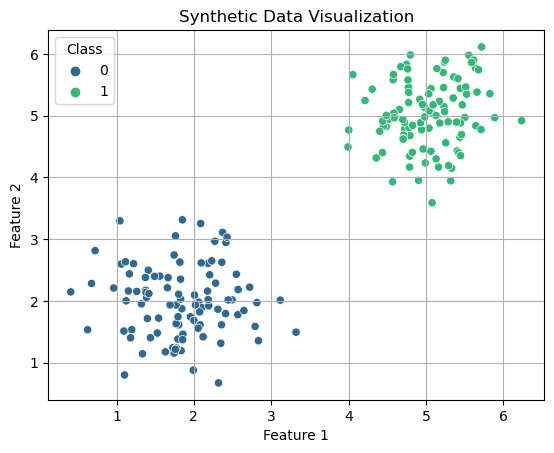

The new point (3, 3) is classified as class 0.


In [7]:
# Import required libraries
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic data
def generate_data(num_points=100):
    """Generates synthetic data for two classes."""
    class_0 = [(random.gauss(2, 0.5), random.gauss(2, 0.5)) for _ in range(num_points)]
    class_1 = [(random.gauss(5, 0.5), random.gauss(5, 0.5)) for _ in range(num_points)]
    
    data = class_0 + class_1
    labels = [0] * num_points + [1] * num_points
    return data, labels

# Visualize the data
def plot_data(data, labels):
    """Plots the synthetic data using Seaborn."""
    df = {'X1': [point[0] for point in data], 
          'X2': [point[1] for point in data], 
          'Label': labels}
    
    sns.scatterplot(data=df, x='X1', y='X2', hue='Label', palette='viridis')
    plt.title('Synthetic Data Visualization')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(title='Class')
    plt.grid()
    plt.show()

# Nearest neighbor classifier
def nearest_neighbor(new_point, data, labels):
    """Classifies a new point using the nearest neighbor method."""
    closest_point = min(data, key=lambda p: (p[0] - new_point[0]) ** 2 + (p[1] - new_point[1]) ** 2)
    index = data.index(closest_point)
    return labels[index]

# Main implementation
if __name__ == "__main__":
    # Step 1: Generate synthetic data
    data, labels = generate_data(num_points=100)
    
    # Step 2: Visualize the generated data
    plot_data(data, labels)
    
    # Step 3: Classify a new point
    new_point = (3, 3)  # New point to classify
    classification = nearest_neighbor(new_point, data, labels)
    print(f"The new point {new_point} is classified as class {classification}.")


## The Sub-problems of Pattern Classification

We have alluded to some of the issues in pattern classification and we now turn to a more explicit list of them. In practice, these typically require the bulk of the research and development effort. Many are domain or problem specific, and their solution will depend upon the knowledge and insights of the designer. Nevertheless, a few are of sufficient generality, difficulty, and interest that they warrant explicit consideration.

##  Feature Extraction

The conceptual boundary between feature extraction and classification proper is somewhat arbitrary: an ideal feature extractor would yield a representation that makes the job of the classifier trivial; conversely, an omnipotent classifier would not need the help of a sophisticated feature extractor. The distinction is forced upon us for practical, rather than theoretical reasons. Generally speaking, the task of feature extraction is much more problem and domain dependent than is classification proper, and thus requires knowledge of the domain. A good feature extractor for sorting fish would surely be of little use for identifying fingerprints, or classifying photomicrographs of blood cells. 

How do we know which features are most promising? Are there ways to automatically learn which features are best for the classifier? How many shall we use?

##  Noise

The lighting of the fish may vary, there could be shadows cast by neighboring equipment, the conveyor belt might shake — all reducing the reliability of the feature values actually measured. We define noise in very general terms: any property of the sensed pattern due not to the true underlying model but instead to randomness in the world or the sensors. All non-trivial decision and pattern recognition problems involve noise in some form. In some cases, it is due to the transduction in the signal, and we may consign to our preprocessor the role of cleaning up the signal, as for instance visual noise in our video camera viewing the fish. An important problem is knowing somehow whether the variation in some signal is noise or instead due to complex underlying models of the fish. How then can we use this information to improve our classifier?

##  Overfitting

In going from Figure 1.4 to Figure 1.5 in our fish classification problem, we were, implicitly, using a more complex model of sea bass and of salmon. That is, we were adjusting the complexity of our classifier. While an overly complex model may allow perfect classification of the training samples, it is unlikely to give good classification of novel patterns — a situation known as overfitting. One of the most important areas of research in statistical pattern classification is determining how to adjust the complexity of the model — not so simple that it cannot explain the differences between the categories, yet not so complex as to give poor classification on novel patterns. Are there principled methods for finding the best (intermediate) complexity for a classifier?

##  Model Selection

We might have been unsatisfied with the performance of our fish classifier in Figures 1.4 & 1.5, and thus jumped to an entirely different class of model, for instance one based on some function of the number and position of the fins, the color of the eyes, the weight, shape of the mouth, and so on. How do we know when a hypothesized model differs significantly from the true model underlying our patterns, and thus a new model is needed? In short, how are we to know to reject a class of models and try another one? Are we as designers reduced to random and tedious trial and error in model selection, never really knowing whether we can expect improved performance? Or might there be principled methods for knowing when to jettison one class of models and invoke another? Can we automate the process?

##  Prior Knowledge

In one limited sense, we have already seen how prior knowledge — about the lightness of the different fish categories helped in the design of a classifier by suggesting a promising feature. Incorporating prior knowledge can be far more subtle and difficult. In some applications, the knowledge ultimately derives from information about the production of the patterns, as we saw in analysis-by-synthesis. In others, the knowledge may be about the form of the underlying categories, or specific attributes of the patterns, such as the fact that a face has two eyes, one nose, and so on.
